In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
img = cv.imread('/Users/anilthapa/football-analysis-yolo/output_videos/cropped_img.jpg')

In [4]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

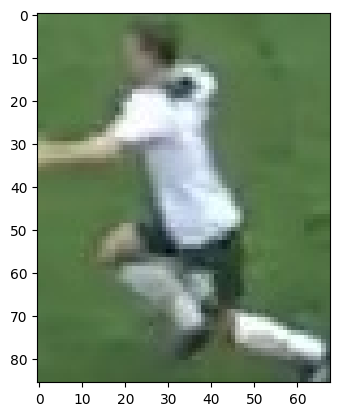

In [6]:
plt.imshow(img)

In [7]:
img.shape

(86, 68, 3)

In [8]:
height, width = img.shape[:2]

In [11]:
top_half_img = img[:height//2]

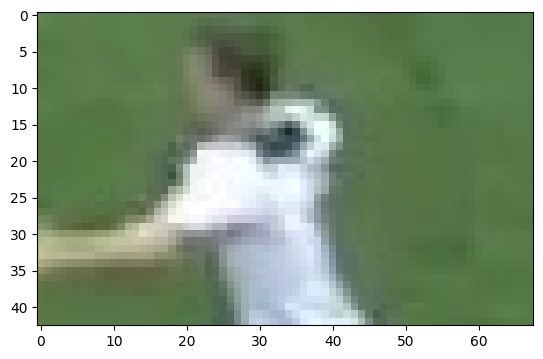

In [12]:
plt.imshow(top_half_img)

In [13]:
top_half_img.shape

(43, 68, 3)

In [14]:
img = top_half_img.reshape(-1, 3)

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [16]:
kmeans.fit(img)

KMeans(n_clusters=2, random_state=42)

In [17]:
labels = kmeans.labels_

In [18]:
labels.shape

(2924,)

In [23]:
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

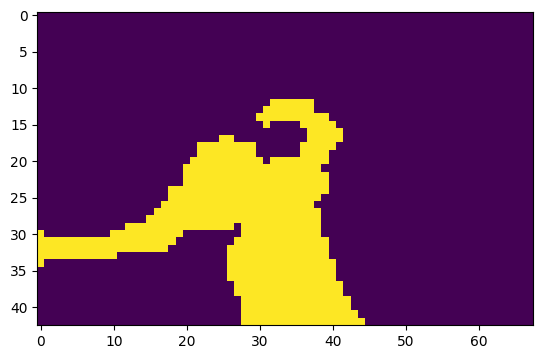

In [25]:
plt.imshow(clustered_img)

In [31]:
corner_clusters = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]

In [32]:
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

In [33]:
non_player_cluster

0

In [34]:
player_cluster = 1 - non_player_cluster

In [35]:
player_cluster

1

In [36]:
kmeans.cluster_centers_[player_cluster]

array([199.26226415, 209.24150943, 212.51698113])

In [38]:
kmeans.cluster_centers_[non_player_cluster]

array([ 90.54761905, 118.31954887,  77.43441938])